In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Exercise 2** \
Create at least three toy dataset (https://scikit-learn.org/stable/datasets/sample_generators.html), then apply GMM algorithm built in the first question or used sklearn library? Try different number of cluster to see how the result change? Draw the elbow and Silhouette score for the above dataset.

In [2]:
# 2
from sklearn.mixture import GaussianMixture

In [54]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.show()

In [98]:
# elbow method
from scipy.spatial.distance import cdist

def elbow_report(X):
    meandist = []
    n_clusters = range(2, 15)
    for n_cluster in n_clusters:
        gmm = GaussianMixture(n_components=n_cluster, random_state=0)
        gmm.fit(X)
        meandist.append(
          sum(
            np.min(
              cdist(X, gmm.means_, 'mahalanobis', VI=gmm.precisions_), 
              axis=1
            ) / X.shape[0]
          )
        )
    plt.plot(n_clusters, meandist,'bx-')
    plt.xlabel('Number of Clusters') 
    plt.show()

from sklearn.metrics import silhouette_score

def silhouette(X):
    scores = []
    n_clusters = range(2, 15)
    for n_cluster in n_clusters:
      gmm = GaussianMixture(n_components=n_cluster, random_state=0)
      gmm.fit(X)
      labels = gmm.predict(X)
      score = silhouette_score(X, labels)
      scores.append(score)

    plt.plot(n_clusters, scores, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

Dataset 1

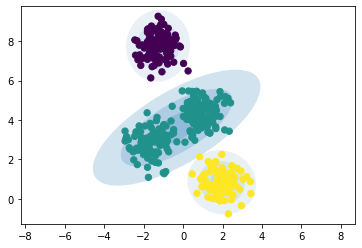

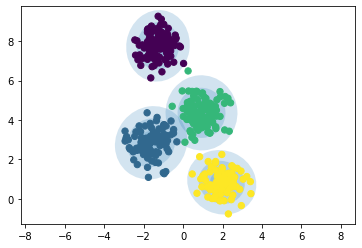

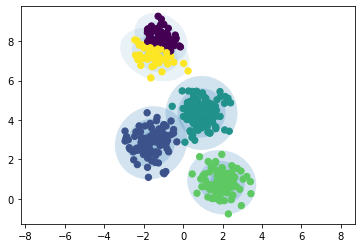

In [82]:
# toy dataset 1
from sklearn.datasets import make_blobs
X1, Y1 = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)

for i in range (3, 6):
  gmm = GaussianMixture(n_components=i, random_state=0)
  plot_gmm(gmm, X1)

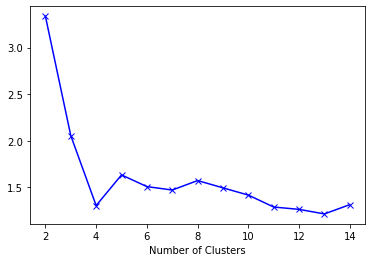

In [93]:
elbow_report(X1)

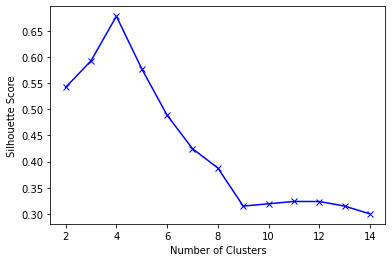

In [99]:
silhouette(X1)

Dataset 2

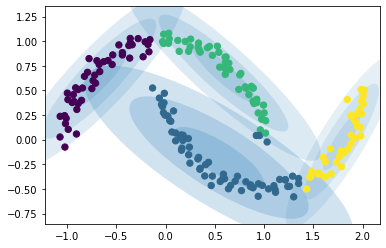

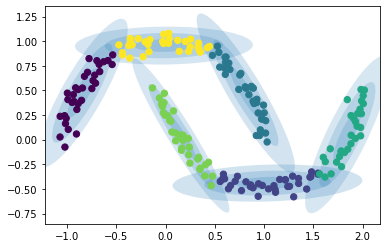

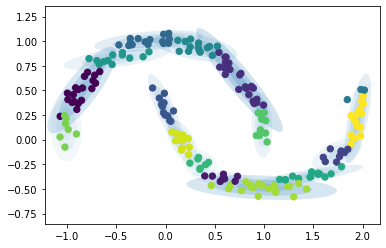

In [96]:
# toy dataset 2
from sklearn.datasets import make_moons
X2, Y2 = make_moons(200, noise=.05, random_state=0)

for i in [4, 6, 16]:
  gmm = GaussianMixture(n_components=i, random_state=0)
  plot_gmm(gmm, X2)

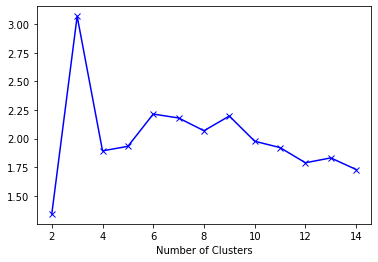

In [95]:
elbow_report(X2)

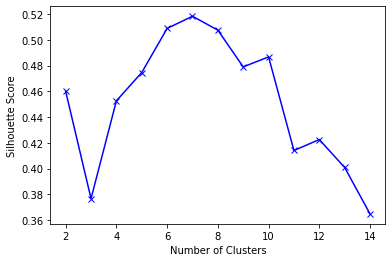

In [100]:
silhouette(X2)

Dataset 3

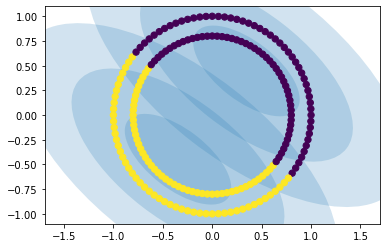

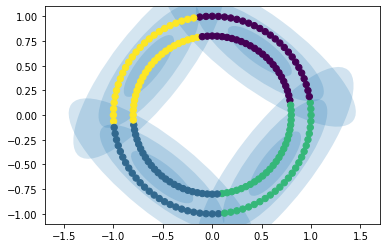

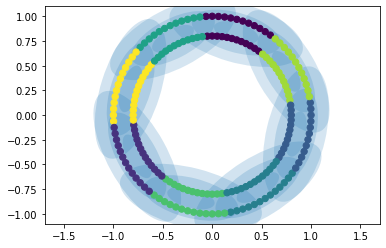

In [74]:
# toy dataset 3
from sklearn.datasets import make_circles
X3, Y3 = make_circles(200, random_state=42)

for i in [2, 4, 8]:
  gmm = GaussianMixture(n_components=i, random_state=0)
  plot_gmm(gmm, X3)

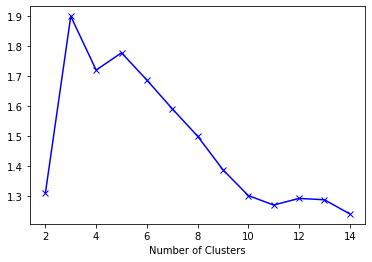

In [97]:
elbow_report(X3)

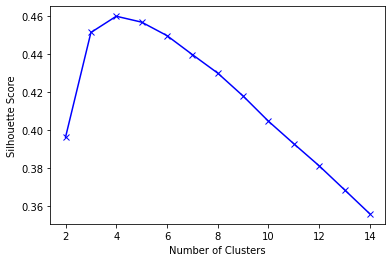

In [101]:
silhouette(X3)

**Exercise 3** Compare K-Means and GMM (cons and pros)

|      | K-Means                                                                                       | GMM                                          |
|------|-----------------------------------------------------------------------------------------------|----------------------------------------------|
| Pros | Simple to understand                                                                          | Analyzes more complex and mixed data         |
|      | Very quick (all that is being computed is the distance between each point and cluster center) | Handles outliers more easily                 |
|      | Easy to implement                                                                             |                                              |
|      |                                                                                               |                                              |
| Cons | Must choose K manually                                                                        | More difficult to directly interpret results |
|      | Depends on initial centroid locations                                                         |                                              |
|      | Potential to misrepresent centroid positions due to outliers                                  |                                              |
|      |                                                                                               |                                              |